###  Clear sky 2018 january 29th camera 2 sw-vers. 1

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import bisect
import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from load_data_from_csv import *

#### Import  Data

In [2]:
day = '2018-01-29'   # select day of observation ('2018-09-29' : camera 2, sw-vers. 1)
s_time = ' 07:00:00' # beginning of observation
e_time = ' 20:00:00' # end of observation
start = day + s_time
end   = day + e_time

#### Weather station at Luzern Switzerland

In [3]:
luz_csv = r'../weather_data/irradiation_luz_2017_2018.csv'

df = process_LUZ(luz_csv)
df.set_index(df.datetime, inplace=True)
df_lu = df['gre000z0']       # 10 min mean in W/m² 
lu_rad = df_lu.loc[start:end]   # set distinct observation day

#lu_rad.head(n=2)

#### Clear Sky solar irradiance from SODA using McClear model
Source: http://www.soda-pro.com/web-services/radiation/cams-mcclear

In [4]:
soda_csv = r'../weather_data/irradiation_soda_2017_2018_1min.csv'

df = process_SODA(soda_csv)
df_soda = df['Clear sky GHI']*60      # given in units of Wh/m² 
mc_rad = df_soda.loc[start:end]       # set distinct observation day

#mc_rad.head(n=2)

#### Load relative luminance from images

In [5]:
calc_csv = r'../lumi_data/20180129_cam2_luminance.csv'

df_calc = process_LUMI(calc_csv)
lum_hdr = df_calc['lum_hdr']          # mean luminance from HDR image
lum_hdr_m = df_calc['lum_hdr_m']      # mean luminance from masked HDR image from raw data
lum_jpg_m = df_calc['lum_jpg_m']      # mean luminance from masked HDR image build from three jpg exposures

#lum_hdr.head(n=2)

#### Pyranometer measurements vs. McClear model

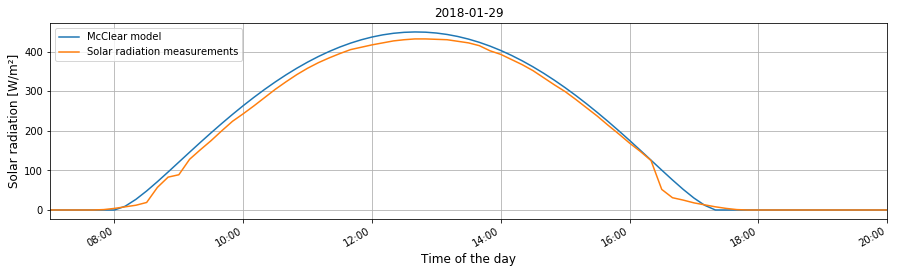

In [6]:
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

fig = plt.figure(1, figsize=(15,4))
mc_rad.plot(label='McClear model')
lu_rad.plot(label='Solar radiation measurements')

plt.xlabel('Time of the day', fontsize=12)
plt.ylabel('Solar radiation [W/m²]', fontsize=12)
plt.legend(loc='upper left')
plt.grid(b=None, which='major', axis='both')
plt.title(day)
fig.autofmt_xdate()
formatter = DateFormatter('%H:%M')
#formatter.set_tzinfo(timezone('Europe/Zurich'))
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

#### Plot with normalized data for  2018-01-29 from 9:00 to 15:00

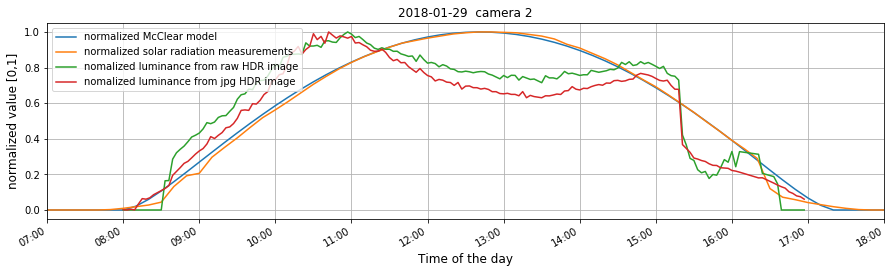

In [15]:
# Set appropriate timezone
matplotlib.rcParams['timezone'] = 'Europe/Zurich'

day = '2018-01-29'   # day of observation ('2018-01-29')
s_time = ' 07:00:00' # beginning of observation
e_time = ' 18:00:00' # end of observation
start = day + s_time
end   = day + e_time

lu_rad = df_lu.loc[start:end]    # weather station
mc_rad = df_soda.loc[start:end]  # McClear model

#print(lu_rad.head(n=5))
#print(lum_hdr.head(n=5))

lu_rad_n  = ((lu_rad-lu_rad.min())/(lu_rad.max()-lu_rad.min()))
mc_rad_n  = ((mc_rad-mc_rad.min())/(mc_rad.max()-mc_rad.min()))
lum_hdr_n = ((lum_hdr-lum_hdr.min())/(lum_hdr.max()-lum_hdr.min()))
lum_jpg_n = ((lum_jpg_m-lum_jpg_m.min())/(lum_jpg_m.max()-lum_jpg_m.min()))

fig = plt.figure(2, figsize=(15,4))
mc_rad_n.plot(label ='normalized McClear model')
lu_rad_n.plot(label ='normalized solar radiation measurements')
lum_hdr_n.plot(label='nomalized luminance from raw HDR image')
lum_jpg_n.plot(label='nomalized luminance from jpg HDR image')

plt.xlabel('Time of the day', fontsize=12)
plt.ylabel('normalized value [0,1]', fontsize=12)
plt.legend(loc='upper left')
plt.grid(b=None, which='major', axis='both')
plt.title(day + '  camera 2')
fig.autofmt_xdate()
formatter = DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

#### Scatterplot mean luminance from HDR images vs. pyranometer measurements

lu_rad_ip:20 lum_hdr:20


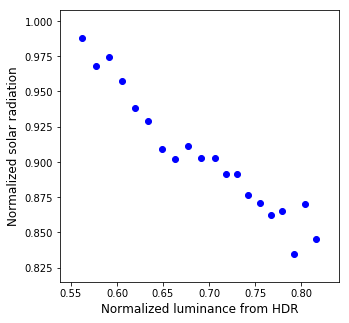

In [14]:
fig = plt.figure(3, figsize=(5,5))

day = '2018-01-29'   # day of observation ('2018-01-29' : camera 1, sw-vers. 1)
s_time = ' 10:00:00' # beginning of observation
e_time = ' 11:00:00' # end of observation
start = day + s_time
end   = day + e_time

_lu_rad_n  = lu_rad_n.loc[start:end]    
_lum_hdr_n = lum_hdr_n.loc[start:end]

#print(lum_hdr.index[1])
#print(lum_hdr.index[-1])
#print('size _lu_rad:{}'.format(_lu_rad.size))

lu_rad_f  = _lu_rad_n.asfreq(freq='3T')
lu_rad_ip = lu_rad_f.interpolate(method = 'linear')

print('lu_rad_ip:{} lum_hdr:{}'.format(lu_rad_ip[0:-1].size,_lum_hdr_n.size))

plt.xlabel('Normalized luminance from HDR', fontsize=12)
plt.ylabel('Normalized solar radiation', fontsize=12)

plt.scatter(x = lu_rad_ip[0:-1], y = _lum_hdr_n, marker='o', color='blue')